In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data Import

In [6]:
file_path = '12.csv'

# Read CSV into DataFrame
df = pd.read_csv(file_path)
# (Optional) Display the first few rows
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [7]:
#difine shape
df.shape

(1156, 7)

In [56]:
#implace column purpose NA with no fillana 
#data preprosesing
df['PURPOSE'].fillna("NOT",inplace=True)


<ipython-input-56-2f8244183fa7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna("NOT",inplace=True)


In [9]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [30]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 45.2+ KB


In [32]:
df.columns = df.columns.str.strip()

# Convert 'START_DATE' to datetime and extract only the date part
df['date'] = pd.to_datetime(df['START_DATE'], errors='coerce').dt.date

# Show the result
print(df[['START_DATE', 'date']].head())

           START_DATE        date
0 2016-01-01 21:11:00  2016-01-01
1 2016-01-02 01:25:00  2016-01-02
2 2016-01-02 20:25:00  2016-01-02
3 2016-01-05 17:31:00  2016-01-05
4 2016-01-06 14:42:00  2016-01-06


In [39]:
df['date'] = pd.to_datetime(df['START_DATE'], errors='coerce').dt.date
df['Time'] = pd.to_datetime(df['START_DATE'], errors='coerce').dt.time

In [42]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,01:25:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20:25:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17:31:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14:42:00


In [73]:
df['day_night'] = pd.to_datetime(df['START_DATE'], errors='coerce').dt.hour.map(
    lambda h: 'Morning' if 6 <= h < 12 else 'Afternoon' if 12 <= h < 17 else 'Night')


In [74]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,Time,time_of_day,day_night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11:00,Night,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,01:25:00,Night,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20:25:00,Night,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17:31:00,Night,Night
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14:42:00,Afternoon,Afternoon


In [75]:
df.dropna(inplace= True)

In [76]:
df.shape

(420, 11)

Data visualization

<function matplotlib.pyplot.show(close=None, block=None)>

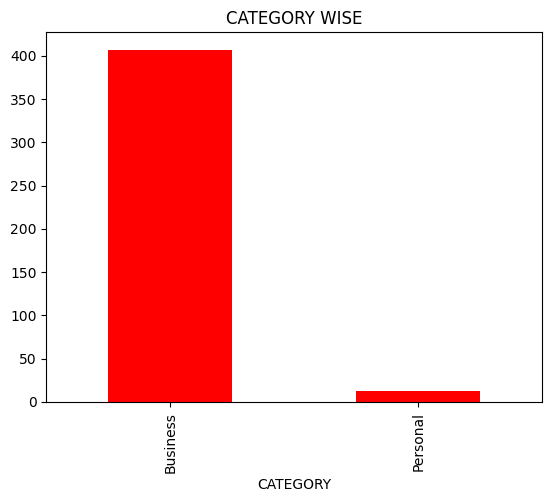

In [77]:
import matplotlib.pyplot as plt
df['CATEGORY'].value_counts().plot(kind='bar', color='red', title='CATEGORY WISE')
plt.show



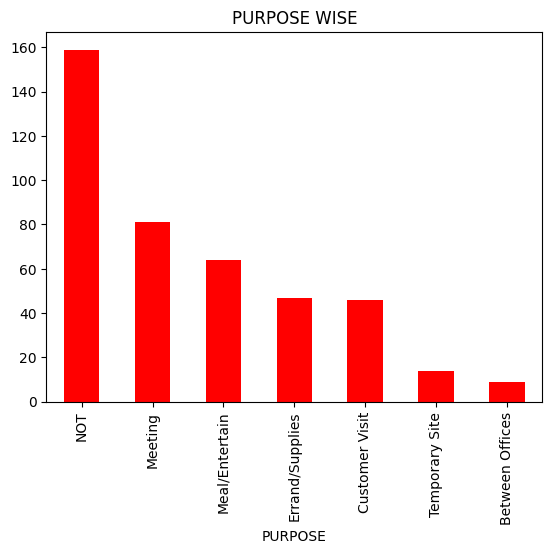

In [78]:
df['PURPOSE'].value_counts().plot(kind='bar', color='red', title='PURPOSE WISE')
plt.show()

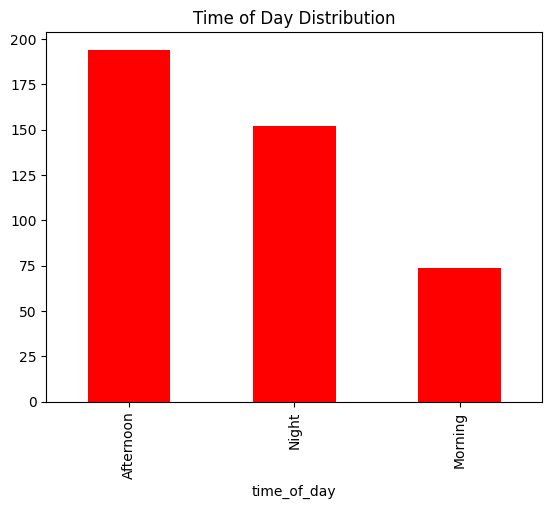

In [87]:
df['time_of_day'] = pd.to_datetime(df['START_DATE'], errors='coerce').dt.hour.map(lambda h: 'Morning' if 6 <= h < 12 else 'Afternoon' if 12 <= h < 18 else 'Night')
df['time_of_day'].value_counts().plot(kind='bar', color='red', title='Time of Day Distribution'); plt.show()


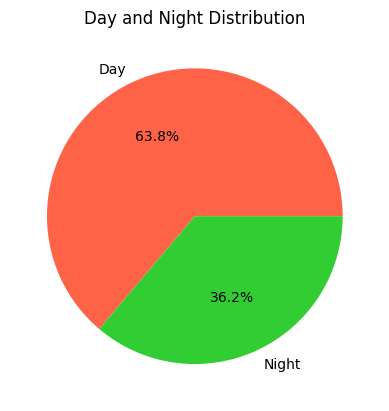

In [93]:
df['day_night'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Day and Night Distribution', colors=['#FF6347', '#32CD32'], legend=False); plt.ylabel(''); plt.show()
